In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Assignment 4 - Stochastic Processes

## Exercise 4.1 - 2D Brownian motion (1 point)

Create a simulation of Brownian motion of a particle in two dimensions

In [7]:
D = 2  # number of dimensions

interval = 10  # total time
dt = 0.01

t = int(interval / dt)
xs = np.cumsum(np.random.normal(0, dt, (t, D)), axis=0)  # cumulative sum of noise

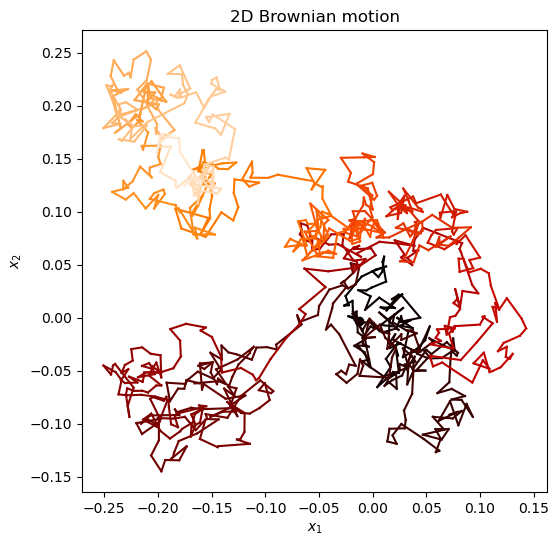

In [8]:
plt.figure(figsize=(6, 6))

# plot all the line segments
for i in range(t):
    color = plt.get_cmap('gist_heat')(i / (t * 1.05))
    plt.plot(xs[i:i+2, 0], xs[i:i+2, 1], color=color)

# plot the starting point
plt.scatter(*xs[0], color='black')

plt.title('2D Brownian motion')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('brownian.png')
plt.show()

## Exercise 4.2 - Fokker-Planck (2 points)

Generate samples from a Wiener process and visualise the evolution of $p(x,t)$ according to the Fokker-Planck equation.

In [9]:
chains = 5
interval = 10
dt = 0.04

t = int(interval / dt)
xss = np.cumsum(np.random.normal(0, np.sqrt(dt), (chains, t)), axis=1)

/usr/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


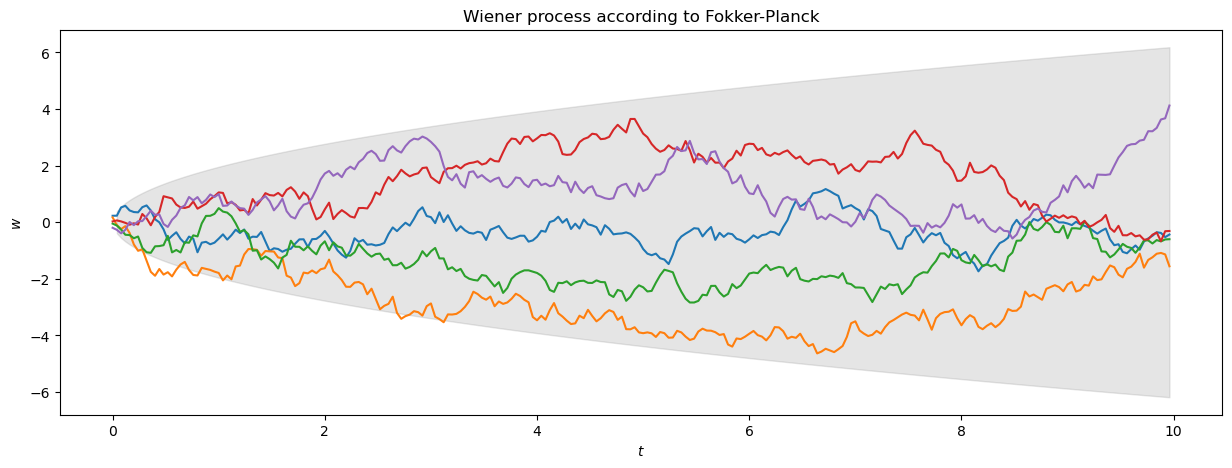

In [10]:
plt.figure(figsize=(15, 5))

# plot the wiener process chains
ts = np.arange(0, interval, dt)
for xs in xss:
    plt.plot(ts, xs)

# plot the confidence interval
confidence = st.norm.interval(confidence=0.95, loc=0, scale=np.sqrt(ts))
plt.fill_between(ts, *confidence, color='gray', alpha=0.2)

plt.title('Wiener process according to Fokker-Planck')
plt.xlabel('$t$')
plt.ylabel('$w$')

plt.savefig('wiener.png')
plt.show()

## Exercise 4.3 - Compound Poisson process (3 points)

Simulate the compound Poisson process under different intensities and a Gaussian jump distribution.

In [11]:
lambdas = [0.1, 0.15, 0.4]
interval = 100
dt = 0.01

chains = len(lambdas)

xss = [[0] for _ in range(chains)]
yss = [[0] for _ in range(chains)]

for i in range(chains):
    while xss[i][-1] < interval:
            step = np.random.poisson(dt * lambdas[i])
            xss[i].append(xss[i][-1] + dt)
            yss[i].append(yss[i][-1] + step * np.random.normal(0, 0.1))

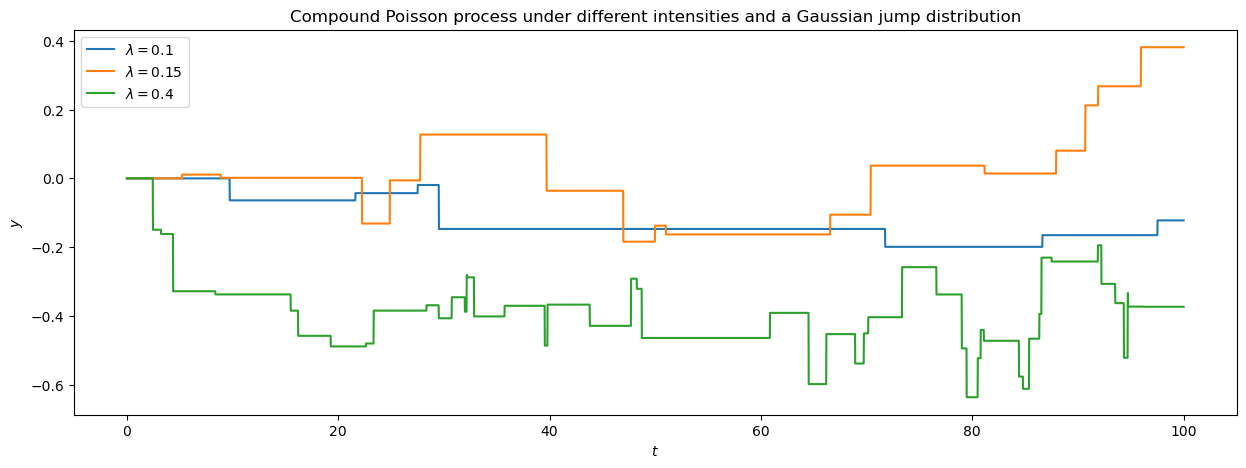

In [12]:
plt.figure(figsize=(15, 5))

# plot the poisson trajectories
for i in range(chains):
    plt.plot(xss[i], yss[i])

plt.legend(list(map(lambda l: f'$\lambda={l}$', lambdas)))
plt.title('Compound Poisson process under different intensities and a Gaussian jump distribution')

plt.xlabel('$t$')
plt.ylabel('$y$')

plt.savefig('poisson.png')
plt.show()

## Exercise 4.4 - Jump-diffusion process (4 points)

Simulate a stochastic harmonic oscillator with jumps. Generate an ensemble of trajectories. Plot a couple of trajectories and plot the confidence interval.

In [13]:
# define the harmonic oscillator dynamics

k = 1     # spring constant
m = 1     # mass hanging from spring
c = 0.4   # damping coefficient

omega = np.sqrt(k / m)
gamma = c / m  

x_init = np.array([0, 1])

noise_var = 1
jump_var = 10
jump_lambda = 0.01

def f(x1, x2, t):
    system = np.array([x2, -omega**2 * x1 - gamma * x2])
    noise = np.array([0, np.random.normal(0, noise_var)])
    jump = np.array([0, np.random.poisson(jump_lambda) * np.random.normal(0, jump_var)])
    return system + noise + jump

In [14]:
# define the simulation dynamics

interval = 20
dt = 0.01

chains = 100

ts = np.arange(0, interval, dt)
xss = [[x_init] for _ in range(chains)]

for t in ts[1:]:
    for i in range(chains):
        xss[i].append(xss[i][-1] + dt * f(*xss[i][-1], t))

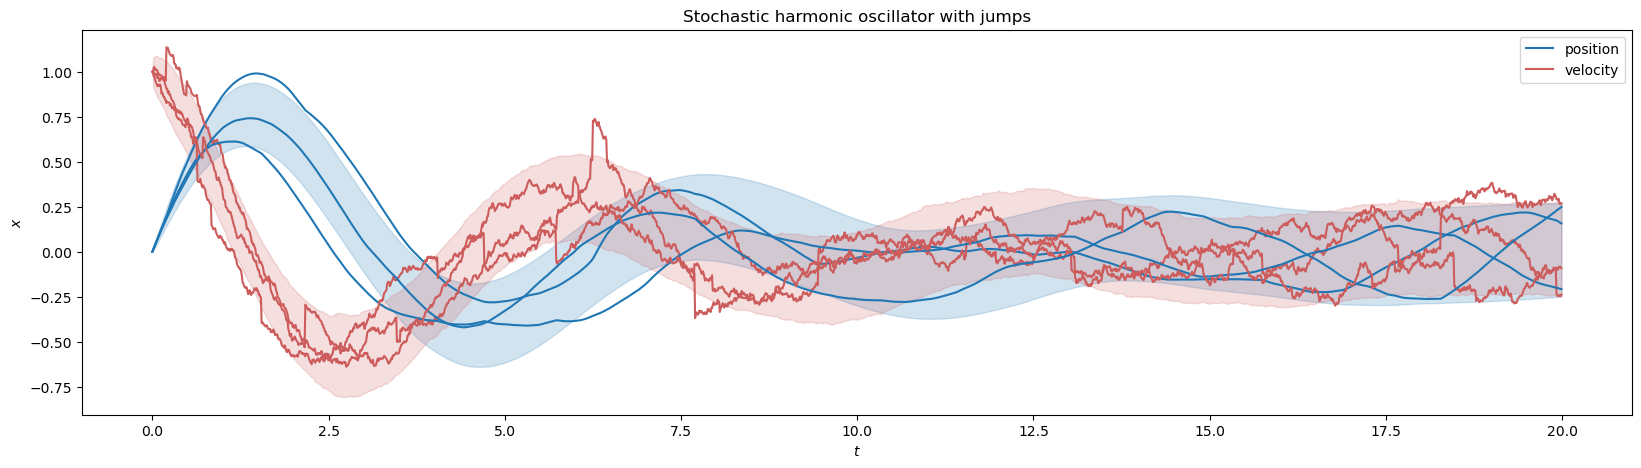

In [15]:
plt.figure(figsize=(20,5))

xss = np.array(xss)

# plot some trajectories
for i in range(min(3, chains)):
    plt.plot(ts, xss[i, :, 0], color='tab:blue')
    plt.plot(ts, xss[i, :, 1], color='indianred')

# compute the confidence interval
mean = np.mean(xss, axis=(0))
std_error = np.sqrt(st.sem(xss, axis=(0)))
confidence = np.array(st.t.interval(0.95, len(ts), loc=mean, scale=std_error))

# plot the confidence interval
plt.fill_between(ts, *confidence[:, :, 0], color='tab:blue', alpha=0.2)
plt.fill_between(ts, *confidence[:, :, 1], color='indianred', alpha=0.2)

# final plotting
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")

plt.legend(['position', 'velocity'])
plt.title('Stochastic harmonic oscillator with jumps')

plt.savefig('oscillator.png')
plt.show()